In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

import os
os.chdir(r"D:\PROJECTS\VoyageVista\CODE")


In [42]:
x = pd.read_csv("D:\PROJECTS\VoyageVista\CODE\data/x_preprocessed.csv")
y = pd.read_csv("D:\PROJECTS\VoyageVista\CODE\data/y_preprocessed.csv")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\1812a\AppData\Local\Temp\ipykernel_13404\895080917.py:1: SyntaxWarning: invalid escape sequence '\P'
  x = pd.read_csv("D:\PROJECTS\VoyageVista\CODE\data/x_preprocessed.csv")
C:\Users\1812a\AppData\Local\Temp\ipykernel_13404\895080917.py:2: SyntaxWarning: invalid escape sequence '\P'
  y = pd.read_csv("D:\PROJECTS\VoyageVista\CODE\data/y_preprocessed.csv")


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [44]:
def save_model(model, filename):
    joblib.dump(model, filename)
    print(f"Model saved as {filename}")

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

print("\nTraining Logistic Regression...")

# Make sure y_train has only 0 and 1
with tqdm(total=100, desc="Logistic Regression") as pbar:
    LogReg = LogisticRegression(max_iter=1000, class_weight="balanced")
    LogReg.fit(x_train, y_train.values.ravel())
    pbar.update(100)

y_pred_lr = LogReg.predict(x_test)

# Save model
import joblib
joblib.dump(LogReg, "logistic_regression_model.joblib")
print("Model saved as logistic_regression_model.joblib")

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, zero_division=0))



Training Logistic Regression...


Logistic Regression: 100%|██████████| 100/100 [00:05<00:00, 18.28it/s]


Model saved as logistic_regression_model.joblib
Logistic Regression Accuracy: 0.3941786873397511
              precision    recall  f1-score   support

           0       0.98      0.38      0.55    704477
           1       0.04      0.71      0.07     23297

    accuracy                           0.39    727774
   macro avg       0.51      0.54      0.31    727774
weighted avg       0.95      0.39      0.54    727774



In [46]:
print("\nTraining Decision Tree...")
with tqdm(total=100, desc="Decision Tree") as pbar:
    model_dt = DecisionTreeClassifier()
    model_dt.fit(x_train, y_train)
    pbar.update(100)

y_pred_dt = model_dt.predict(x_test)
save_model(model_dt, "decision_tree_model.joblib")
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))



Training Decision Tree...


Decision Tree: 100%|██████████| 100/100 [00:06<00:00, 14.46it/s]


Model saved as decision_tree_model.joblib
Decision Tree Accuracy: 0.9653779882216182
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    704477
           1       0.26      0.04      0.07     23297

    accuracy                           0.97    727774
   macro avg       0.61      0.52      0.53    727774
weighted avg       0.95      0.97      0.95    727774



In [47]:
print("\nTraining Random Forest...")
with tqdm(total=100, desc="Random Forest") as pbar:
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(x_train, y_train.values.ravel())
    pbar.update(100)

y_pred_rf = rf.predict(x_test)
save_model(rf, "random_forest_model.joblib")
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Training Random Forest...


Random Forest: 100%|██████████| 100/100 [06:50<00:00,  4.10s/it]


Model saved as random_forest_model.joblib
Random Forest Accuracy: 0.9649506577591395
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    704477
           1       0.26      0.05      0.08     23297

    accuracy                           0.96    727774
   macro avg       0.61      0.52      0.53    727774
weighted avg       0.95      0.96      0.95    727774



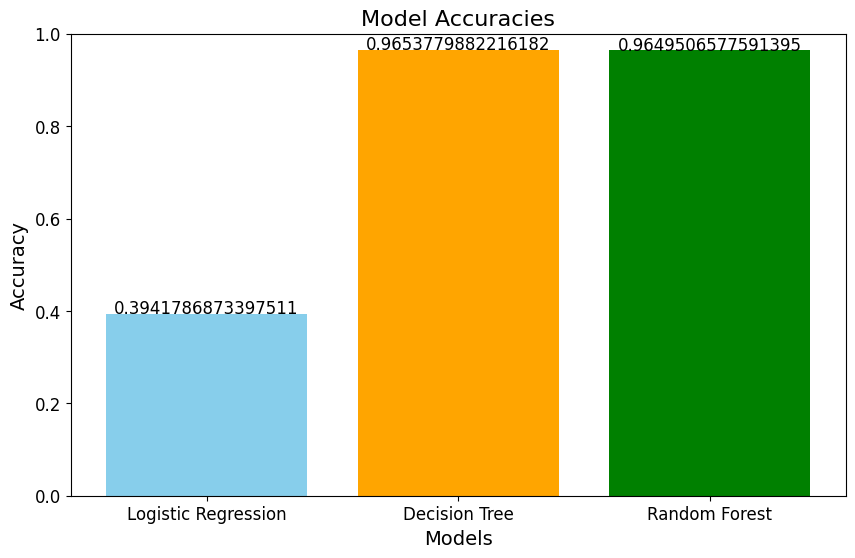

Best Model: Decision Tree with Accuracy: 0.9653779882216182


In [48]:
# Store the accuracies of the models
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf)
}

# Find the model with the highest accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=["skyblue", "orange", "green"])
plt.title("Model Accuracies", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Highlight the best model
for i, (model, acc) in enumerate(model_accuracies.items()):
    plt.text(i, acc, f"{acc:}", ha='center', fontsize=12)


plt.show()

# Print the best model and its accuracy
print(f"Best Model: {best_model} with Accuracy: {best_accuracy:}")


WE WILL USE DECISION TREE FOR OUR PROJECT